In [1]:
import gym
import pygame
import time
import matplotlib.pyplot as plt
import numpy as np
from dqn import DQN
from keras.utils import plot_model
from collections import deque

In [2]:
num_episodes = 100
target_update_frequency = 1000
max_steps_per_episode = 10000
y = 1.0  # discount factor
initial_epsilon = 1.0
final_epsilon = 0.1
batch_size = 8
blend = 4
skip_start = 65

epsilon_decay_rate = (initial_epsilon - final_epsilon) / num_episodes
epsilon = initial_epsilon
stats_check = max(num_episodes // 100, 1)

reward_history = ([], [])
loss_history = ([], [])

c:\Users\guybo\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (210, 160)
  logger.warn(


Loaded weights


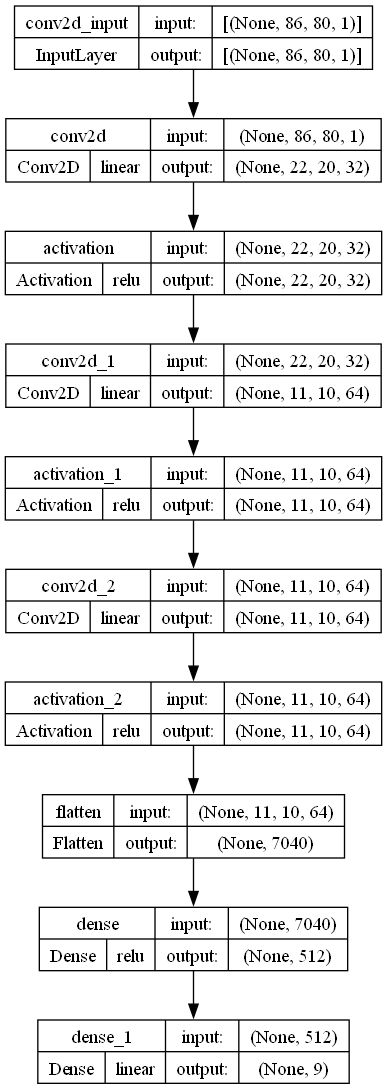

In [3]:
env = gym.make(
    "ALE/MsPacman-v5",
    full_action_space=False,
    obs_type="grayscale",
    # render_mode="human",
)  # Create the environment
agent = DQN((86, 80, 1), env.action_space.n, y, r".\pacman_agent_ale", 100000)
plot_model(agent.q_network, show_shapes=True, show_layer_activations=True)

In [4]:
# Helpful preprocessing taken from github.com/ageron/tiny-dqn
def process_frame(frame):
    mspacman_color = 167
    img = frame[1:172:2, ::2]  # Crop and downsize
    img[img == mspacman_color] = 255  # Improve contrast by making pacman white
    img = img / 128.0  # Normalize from -1 to 1.
    img -= 1

    return img.reshape(86, 80, 1)

In [5]:
def blend_images(images, blend):
    avg_image = np.zeros((86, 80, 1), np.float64)

    for image in images:
        avg_image += image

    if len(images) < blend:
        return avg_image / len(images)
    else:
        return avg_image / blend

In [6]:
env = gym.make(
    "ALE/MsPacman-v5",
    full_action_space=False,
    obs_type="grayscale",
    render_mode="human",
)
closed = False

while not closed:
    state = process_frame(env.reset()[0])
    images = deque(maxlen=blend)  # Array of images to be blended
    images.append(state)

    while True:
        state = blend_images(images, blend)
        action = agent.predict_action(state, env, epsilon)
        next_state, reward, terminated, truncated, info = env.step(action)
        if info["lives"] < 3:
            reward = -10
        print(reward - 1, info)

        next_state = process_frame(next_state)
        images.append(next_state)
        next_state = blend_images(images, blend)
        state = next_state

        for event in pygame.event.get():
            if event.type == pygame.KEYDOWN and event.key == pygame.K_g:
                closed = True
                break

        if terminated or truncated or closed or info["lives"] < 3:
            break
    if closed:
        break

c:\Users\guybo\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


-1.0 {'lives': 3, 'episode_frame_number': 4, 'frame_number': 4}
-1.0 {'lives': 3, 'episode_frame_number': 8, 'frame_number': 8}
-1.0 {'lives': 3, 'episode_frame_number': 12, 'frame_number': 12}
-1.0 {'lives': 3, 'episode_frame_number': 16, 'frame_number': 16}
-1.0 {'lives': 3, 'episode_frame_number': 20, 'frame_number': 20}
-1.0 {'lives': 3, 'episode_frame_number': 24, 'frame_number': 24}
-1.0 {'lives': 3, 'episode_frame_number': 28, 'frame_number': 28}
-1.0 {'lives': 3, 'episode_frame_number': 32, 'frame_number': 32}
-1.0 {'lives': 3, 'episode_frame_number': 36, 'frame_number': 36}
-1.0 {'lives': 3, 'episode_frame_number': 40, 'frame_number': 40}
-1.0 {'lives': 3, 'episode_frame_number': 44, 'frame_number': 44}
-1.0 {'lives': 3, 'episode_frame_number': 48, 'frame_number': 48}
-1.0 {'lives': 3, 'episode_frame_number': 52, 'frame_number': 52}
-1.0 {'lives': 3, 'episode_frame_number': 56, 'frame_number': 56}
-1.0 {'lives': 3, 'episode_frame_number': 60, 'frame_number': 60}
-1.0 {'lives':

: 